In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm

# Data Preparation

In [2]:
df = pd.read_csv('dataset/cleandata_time_ok.csv', delimiter = ',')
print(df.shape)
display(df.head(2))
display(df.info())
display(df.describe())

(3491308, 12)


,Date-Time,Type,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy
0,2021-01-04T09:30:01.673284287,Quote,NaN,NaN,19.0,24.0,19.07,6.0,NaN,2021-01-04,NaN,09:30:01.673284
1,2021-01-04T09:30:01.673284287,Quote,NaN,NaN,19.0,24.0,19.01,6.0,NaN,2021-01-04,NaN,09:30:01.673284


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491308 entries, 0 to 3491307
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Date-Time           object 
 1   Type                object 
 2   Price               float64
 3   Volume              float64
 4   Bid Price           float64
 5   Bid Size            float64
 6   Ask Price           float64
 7   Ask Size            float64
 8   Tick Dir.           object 
 9   Date                object 
 10  num_tick_direction  float64
 11  Exchange_Time_copy  object 
dtypes: float64(7), object(5)
memory usage: 319.6+ MB


None

,Price,Volume,Bid Price,Bid Size,Ask Price,Ask Size,num_tick_direction
count,1.377859e+06,1.377859e+06,3.491308e+06,3.491308e+06,3.491308e+06,3.491308e+06,377339.000000
mean,1.872580e+02,9.021554e+01,1.357627e+02,6.963457e+00,1.368762e+02,7.322325e+00,-0.000623
std,1.288883e+02,1.996205e+03,1.228293e+02,4.908565e+01,1.240740e+02,4.234311e+01,1.000001
min,1.710000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000
25%,6.625000e+01,5.000000e+00,3.891000e+01,1.000000e+00,3.903000e+01,1.000000e+00,-1.000000
50%,1.380100e+02,2.500000e+01,7.803000e+01,1.000000e+00,7.850000e+01,1.000000e+00,-1.000000
75%,3.188700e+02,1.000000e+02,2.593300e+02,3.000000e+00,2.630000e+02,3.000000e+00,1.000000
max,4.830000e+02,1.749449e+06,4.808600e+02,4.077000e+03,4.831700e+02,4.143000e+03,1.000000


## Trade Filter and To_Datetime

In [3]:
df['Date-Time'] = pd.to_datetime(df['Date-Time'])
df.set_index('Date-Time', inplace = True)

# Trade is for without resampling, to give insight on the overall period
trade = df[df['Type'] == 'Trade'].copy(deep = True)

# Trade_2 is the one for resampling 1-min and 5-min intervals
trade_2 = df[df['Type'] == 'Trade'].copy(deep = True)

display(trade.shape)
display(trade_2.shape)

# Insert Volume Classifier
trade.insert(3, 'Trade_Size_L1', '')
trade.insert(4, 'Trade_Size_L2', '')
trade_2.insert(3, 'Trade_Size_L1', '')
trade_2.insert(4, 'Trade_Size_L2', '')

# Ensure date-time series
print(type(trade.index[0]))
print(type(trade_2.index[0]))

(1377859, 11)

(1377859, 11)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
trade.info()
trade_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1377859 entries, 2021-01-04 09:30:01.676587591 to 2021-01-29 15:59:59.984096412
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Type                1377859 non-null  object 
 1   Price               1377859 non-null  float64
 2   Volume              1377859 non-null  float64
 3   Trade_Size_L1       1377859 non-null  object 
 4   Trade_Size_L2       1377859 non-null  object 
 5   Bid Price           1377859 non-null  float64
 6   Bid Size            1377859 non-null  float64
 7   Ask Price           1377859 non-null  float64
 8   Ask Size            1377859 non-null  float64
 9   Tick Dir.           377339 non-null   object 
 10  Date                1377859 non-null  object 
 11  num_tick_direction  377339 non-null   float64
 12  Exchange_Time_copy  1377859 non-null  object 
dtypes: float64(7), object(6)
memory usage: 147.2+ MB
<class 'pandas.

## Global Charting

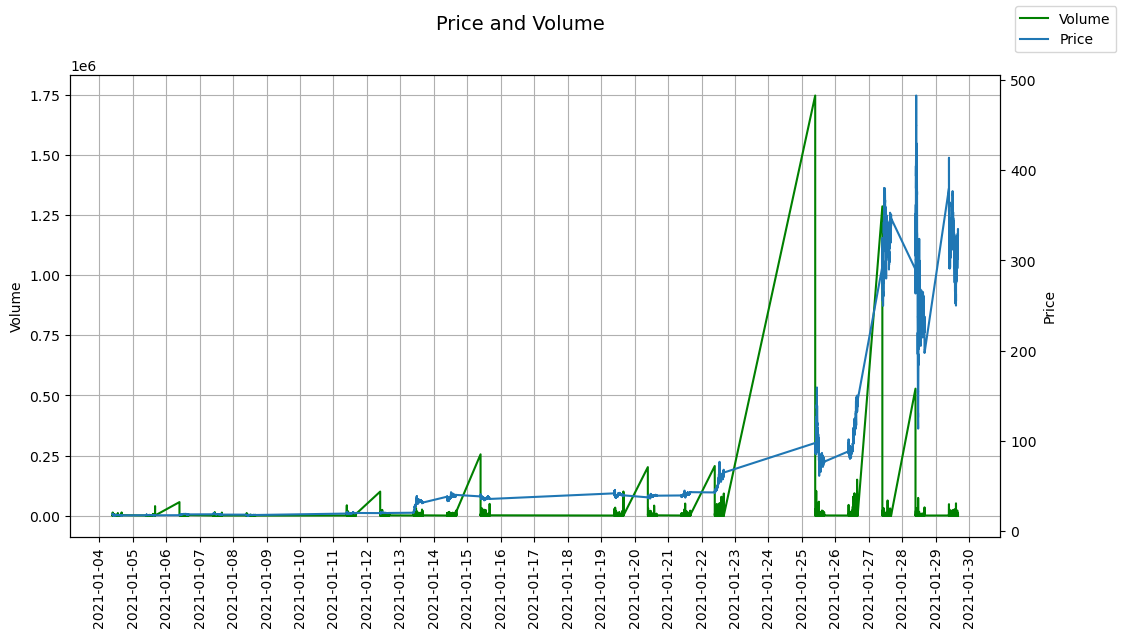

In [5]:
# Chart: Volume
fig = plt.figure(figsize = (12,6))
ax0 = fig.add_subplot(111)
ax0.plot(trade.index, trade['Volume'], 'g', label = 'Volume')
plt.xticks(rotation = 90)
ax0.grid()

# Chart: Price
ax1 = ax0.twinx()
ax1.plot(trade.index, trade['Price'], label = 'Price')

# Ticks, Title, Labels
ax0.xaxis.set_major_locator(mdates.DayLocator())
ax0.set_ylabel('Volume')
ax1.set_ylabel('Price')
fig.legend()
fig.suptitle('Price and Volume', fontsize = 14)

plt.show()


# Functions and Entire Dataset

In [6]:
# Column Indices
display(trade.head(5))
interp_lin = trade.iloc[:, 1:7]
display(interp_lin.columns)

,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy
Date-Time,,,,,,,,,,,,,
2021-01-04 09:30:01.676587591,Trade,19.01,25.0,,,19.0,24.0,19.02,1.0,NaN,2021-01-04,NaN,09:30:01.676587
2021-01-04 09:30:02.752529040,Trade,19.04,20.0,,,19.0,24.0,19.06,1.0,NaN,2021-01-04,NaN,09:30:02.752529
2021-01-04 09:30:03.784980999,Trade,19.05,2.0,,,19.0,24.0,19.06,1.0,NaN,2021-01-04,NaN,09:30:03.784980
2021-01-04 09:30:04.792279959,Trade,19.05,49.0,,,19.0,22.0,19.06,1.0,NaN,2021-01-04,NaN,09:30:04.792279
2021-01-04 09:30:04.792279959,Trade,19.06,100.0,,,19.0,22.0,19.06,1.0,^,2021-01-04,1.0,09:30:04.792279


Index(['Price', 'Volume', 'Trade_Size_L1', 'Trade_Size_L2', 'Bid Price',
       'Bid Size'],
      dtype='object')

## Helper Functions

In [44]:
def trade_cat_lit(df):
    
    '''
    Consider to remove Medium L2 accordingly
    This is still based on the literature review to break down the Medium size
    '''
    
    # Trade Categories based on Literature

    # Calculate Volume Classifier L1
    df.loc[df['Volume'] <= 499, 'Trade_Size_L1'] = 'Small'
    df.loc[(df['Volume'] > 499) & (df['Volume'] <= 9999), 'Trade_Size_L1'] = 'Medium'
    df.loc[(df['Volume'] > 9999), 'Trade_Size_L1'] = 'Large'

    # Calculate Volume Classifier L2
    df.loc[df['Volume'] <= 99, 'Trade_Size_L2'] = '<100'
    df.loc[(df['Volume'] > 99 ) & (df['Volume'] <= 199), 'Trade_Size_L2'] = '100-199'
    df.loc[(df['Volume'] > 199 ) & (df['Volume'] <= 299), 'Trade_Size_L2'] = '200-299'
    df.loc[(df['Volume'] > 299 ) & (df['Volume'] <= 399), 'Trade_Size_L2'] = '300-399'
    df.loc[(df['Volume'] > 399 ) & (df['Volume'] <= 499), 'Trade_Size_L2'] = '400-499'
    df.loc[(df['Volume'] > 499) & (df['Volume'] <= 999), 'Trade_Size_L2'] = '500-999'
    df.loc[(df['Volume'] > 999) & (df['Volume'] <= 2999), 'Trade_Size_L2'] = '1000-2999'
    df.loc[(df['Volume'] > 2999) & (df['Volume'] <= 5999), 'Trade_Size_L2'] = '3000-5999'
    df.loc[(df['Volume'] > 5999) & (df['Volume'] <= 9999), 'Trade_Size_L2'] = '6000-9999'
    df.loc[(df['Volume'] > 9999), 'Trade_Size_L2'] = '10000+'
    
    return df

In [43]:
def trade_cat(df):
    
    '''
    This is my interpretation of the result,
    modified by introducing Micro group and combining the Small subgroups, and Medium subgroups.
    '''
    
    # Trade Categories based on Literature

    # Calculate Volume Classifier L1
    df.loc[(df['Volume'] <= 99), 'Trade_Size_L1'] = 'Micro'
    df.loc[(df['Volume'] > 99) & (df['Volume'] <= 499), 'Trade_Size_L1'] = 'Small'
    df.loc[(df['Volume'] > 499) & (df['Volume'] <= 9999), 'Trade_Size_L1'] = 'Medium'
    df.loc[(df['Volume'] > 9999), 'Trade_Size_L1'] = 'Large'

    # Calculate Volume Classifier L2
    df.loc[df['Volume'] <= 99, 'Trade_Size_L2'] = '<100'
    df.loc[(df['Volume'] > 99 ) & (df['Volume'] <= 199), 'Trade_Size_L2'] = '100-199'
    df.loc[(df['Volume'] > 199 ) & (df['Volume'] <= 299), 'Trade_Size_L2'] = '200-299'
    df.loc[(df['Volume'] > 299 ) & (df['Volume'] <= 399), 'Trade_Size_L2'] = '300-399'
    df.loc[(df['Volume'] > 399 ) & (df['Volume'] <= 499), 'Trade_Size_L2'] = '400-499'
    df.loc[(df['Volume'] > 499) & (df['Volume'] <= 999), 'Trade_Size_L2'] = '500-999'
    df.loc[(df['Volume'] > 999) & (df['Volume'] <= 2999), 'Trade_Size_L2'] = '1000-2999'
    df.loc[(df['Volume'] > 2999) & (df['Volume'] <= 5999), 'Trade_Size_L2'] = '3000-5999'
    df.loc[(df['Volume'] > 5999) & (df['Volume'] <= 9999), 'Trade_Size_L2'] = '6000-9999'
    df.loc[(df['Volume'] > 9999), 'Trade_Size_L2'] = '10000+'
    
    return df

In [139]:
def mqr_prc_c(df):
    '''
    Calculate Mid-Quote Return and Cumulative Price Change
    '''
    # Mid Quote Return
    df['Mid_Quote'] = (df['Bid Price'] + df['Ask Price'])/2

    df['Mid_Quote_Return'] = (df['Mid_Quote'].diff()/(df['Mid_Quote'].shift(periods = 1))).fillna(0)


    # Price Change
    df['Price_Change'] = df['Mid_Quote'].diff().fillna(0)
    
    
    # Price Change -- Abs Value for Cross-Section Weighting
    df['Price_Change_Abs'] = np.abs(df['Mid_Quote'].diff().fillna(0))
        
    # Add new column of previous mid-quote
    df['Prev_Trade_Mid_Quote'] = df['Mid_Quote'].shift(periods = 1).fillna(0)
    
    # Add new column of next mid-quote
    df['Next_Trade_Mid_Quote'] = df['Mid_Quote'].shift(periods = -1).fillna(0)
    
    display(df[['Price', 'Volume','Ask Price', 'Bid Price', 'Mid_Quote', 'Mid_Quote_Return', 'Price_Change', 'Price_Change_Abs', 'Prev_Trade_Mid_Quote', 'Next_Trade_Mid_Quote']])
    
    return df
    

In [68]:
def piv_varrat(df):
    '''
    Create pivot table of variance ratio as per literature
    '''
    # Create Pivot Table

    piv_varrat = pd.pivot_table(df, index = [df.index.date, 'Trade_Size_L1'],
                                 values = ['Mid_Quote_Return'], 
                                  aggfunc = np.std, margins = False)

    # Calculate value of Variance
    piv_varrat = piv_varrat.rename(columns = {'Mid_Quote_Return':'STD of MQR'})


    piv_varrat['Variance'] = (piv_varrat['STD of MQR'] **2)

    
    return piv_varrat
    

In [144]:
def simple_pi_spread(df):
    '''
    Calculate simple price impact and spreads (proxies for liquidity)
    '''
    # 1. Simple Price Impact
    # create a new column 'TickSB' based on the condition of Ask and Bid Price to Price
    df['TickSB'] = df.apply(lambda row: -1 if ((row['Price'] - row['Bid Price']) <  (row['Price'] - row['Ask Price'])) else 1, axis = 1)

    df['Simple_PI'] = 2 * df['TickSB'] * (df['Next_Trade_Mid_Quote'] - df['Mid_Quote'])/df['Mid_Quote']
    
    # 2. Spread
    df['Eff_Spread'] = 2 * df['TickSB'] * (df['Price'] - df['Mid_Quote'])/df['Mid_Quote']
    df['Realised_Spread'] = df['Eff_Spread'] - df['Simple_PI']
    
    return df

In [9]:
def plot_(df, interval, aggr):
    '''
    Can use this in a loop to compare resampling techniques
    '''

    # Value Counts
    display(trade['Trade_Size_L1'].value_counts())
    display(trade['Trade_Size_L2'].value_counts())
    trade_size_l1 = trade['Trade_Size_L1'].unique()

    # Plotting
    fig, ax = plt.subplots(figsize = (12,6))

    ax0 = fig.add_subplot()
    ax0.grid()
    plt.xticks(rotation = 90)

    ax1 = ax0.twinx()
    
    ax0 = sns.lineplot(x = df.index, y = 'Mid_Quote_Return', data = df, hue = 'Trade_Size_L1') #label = 'Mid-Quote Return'
    sns.lineplot(x = df.index, y = 'Price_Change', data = df, hue = 'Trade_Size_L1', ax = ax1, linestyle = '--') #label = 'Price Change'

   
    # Ticks, Title, Labels
    ax0.xaxis.set_major_locator(mdates.DayLocator())
    ax0.set_ylabel('Mid-Quote Return')
    ax1.set_ylabel('Price Change')
 
    fig.suptitle(f'Mid-Quote Return and Price Change by Size {interval} with {aggr} Aggregation', fontsize = 14)
    
    plt.show()

In [56]:
def piv_cumprice(df):
    '''
    Create pivot table as per literature
    '''
    # Create Pivot Table

    piv_cumprice = pd.pivot_table(df, index = ['Trade_Size_L1', 'Trade_Size_L2'],
                                 values = ['Price_Change', 'Price','Volume'], 
                                  aggfunc = {'Price_Change':np.sum,'Price':'count','Volume': np.sum}, margins = False)

    # Calculate value of %age, account for heteroskedasticity --> cross-section weight
    
#     abs_price_change = sum(df['Price_Change_Abs'])
#     print(abs_price_change)
    
    piv_cumprice['% Price_Change'] = np.round((piv_cumprice['Price_Change']/piv_cumprice['Price_Change'].sum())*100, 2)
    piv_cumprice['% Trade'] = np.round((piv_cumprice['Price']/piv_cumprice['Price'].sum())*100, 2)
    piv_cumprice['% Volume'] = np.round((piv_cumprice['Volume']/piv_cumprice['Volume'].sum())*100, 2)

    piv_cumprice = piv_cumprice.rename(columns = {'Price':'# of Trade'})

    # Final Pivot Table with sum
    piv_cumprice = pd.pivot_table(piv_cumprice, index = ['Trade_Size_L1', 'Trade_Size_L2'], 
                                  aggfunc = 'sum', margins = 'all')

    # Add Subtotals
    
#     piv_cumprice = pd.concat([y.append(y.sum().rename((x, 'Total')))for x, y in piv_cumprice.groupby(level = 0)]).append(piv_cumprice.sum().rename(('Grand', 'Total')))
    

    # Sort index S-M-L
    piv_cumprice = piv_cumprice.sort_index(level = [0, 1], ascending = [False, True]) 
    
    new_order = ['Price_Change', '% Price_Change',
                 '# of Trade', '% Trade', 'Volume', '% Volume']

    piv_cumprice = piv_cumprice.reindex(columns = new_order)

    display(piv_cumprice)
    

In [58]:
# In the resampled dataframes, the max might not be captured because the aggregation function is 'last'

max(trade['Volume'])


1749449.0

## Trade Category

In [46]:
# Trade category

# result = [trade_min_last, trade_h_last, trade_min_mean, trade_h_mean]
# for i in result:
#         i = trade_cat(i)
        
trade_cat(trade)

,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote
Date-Time,,,,,,,,,,,,,,,,,,
2021-01-04 09:30:01.676587591,Trade,19.01,25.0,Micro,<100,19.0,24.0,19.02,1.0,NaN,2021-01-04,NaN,09:30:01.676587,19.01,0.000000,0.00,0.00,0.00
2021-01-04 09:30:02.752529040,Trade,19.04,20.0,Micro,<100,19.0,24.0,19.06,1.0,NaN,2021-01-04,NaN,09:30:02.752529,19.03,0.001052,0.02,0.02,19.01
2021-01-04 09:30:03.784980999,Trade,19.05,2.0,Micro,<100,19.0,24.0,19.06,1.0,NaN,2021-01-04,NaN,09:30:03.784980,19.03,0.000000,0.00,0.00,19.03
2021-01-04 09:30:04.792279959,Trade,19.05,49.0,Micro,<100,19.0,22.0,19.06,1.0,NaN,2021-01-04,NaN,09:30:04.792279,19.03,0.000000,0.00,0.00,19.03
2021-01-04 09:30:04.792279959,Trade,19.06,100.0,Small,100-199,19.0,22.0,19.06,1.0,^,2021-01-04,1.0,09:30:04.792279,19.03,0.000000,0.00,0.00,19.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:59:59.875667000,Trade,328.00,15.0,Micro,<100,328.0,23.0,328.48,1.0,NaN,2021-01-29,NaN,15:59:59.875667,328.24,0.000000,0.00,0.00,328.24
2021-01-29 15:59:59.887567967,Trade,328.00,10.0,Micro,<100,328.0,23.0,328.48,1.0,NaN,2021-01-29,NaN,15:59:59.887567,328.24,0.000000,0.00,0.00,328.24
2021-01-29 15:59:59.936339122,Trade,328.00,1.0,Micro,<100,328.0,23.0,328.48,1.0,NaN,2021-01-29,NaN,15:59:59.936339,328.24,0.000000,0.00,0.00,328.24


In [59]:
# Checking unique values of L1, should include Micro

trade['Trade_Size_L1'].unique()

array(['Micro', 'Small', 'Medium', 'Large'], dtype=object)

## Mid Quote Return

In [48]:
# Mid-Quote Return and Price Cumulative

# for i in result:
#         i = mqr_prc_c(i)

for_test = mqr_prc_c(trade)

# Testing for the final columns
for_test.info()

,Price,Volume,Ask Price,Bid Price,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote
Date-Time,,,,,,,,,
2021-01-04 09:30:01.676587591,19.01,25.0,19.02,19.0,19.01,0.000000,0.00,0.00,0.00
2021-01-04 09:30:02.752529040,19.04,20.0,19.06,19.0,19.03,0.001052,0.02,0.02,19.01
2021-01-04 09:30:03.784980999,19.05,2.0,19.06,19.0,19.03,0.000000,0.00,0.00,19.03
2021-01-04 09:30:04.792279959,19.05,49.0,19.06,19.0,19.03,0.000000,0.00,0.00,19.03
2021-01-04 09:30:04.792279959,19.06,100.0,19.06,19.0,19.03,0.000000,0.00,0.00,19.03
...,...,...,...,...,...,...,...,...,...
2021-01-29 15:59:59.875667000,328.00,15.0,328.48,328.0,328.24,0.000000,0.00,0.00,328.24
2021-01-29 15:59:59.887567967,328.00,10.0,328.48,328.0,328.24,0.000000,0.00,0.00,328.24
2021-01-29 15:59:59.936339122,328.00,1.0,328.48,328.0,328.24,0.000000,0.00,0.00,328.24


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1377859 entries, 2021-01-04 09:30:01.676587591 to 2021-01-29 15:59:59.984096412
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Type                  1377859 non-null  object 
 1   Price                 1377859 non-null  float64
 2   Volume                1377859 non-null  float64
 3   Trade_Size_L1         1377859 non-null  object 
 4   Trade_Size_L2         1377859 non-null  object 
 5   Bid Price             1377859 non-null  float64
 6   Bid Size              1377859 non-null  float64
 7   Ask Price             1377859 non-null  float64
 8   Ask Size              1377859 non-null  float64
 9   Tick Dir.             377339 non-null   object 
 10  Date                  1377859 non-null  object 
 11  num_tick_direction    377339 non-null   float64
 12  Exchange_Time_copy    1377859 non-null  object 
 13  Mid_Quote             1377859 non-

In [49]:
# Test Formula to compare with the literature review
mqr_now = for_test.iloc[182,13]
mqr_prev = for_test.iloc[181,13]
mqr = (mqr_now - mqr_prev)/mqr_prev
print(mqr)
print(mqr == for_test.iloc[182,14]) 

-0.0019037258634754743
True


In [60]:
# Test to see if the price change is indeed driven by Micro and Large

for_test.sort_values('Price_Change', ascending = False)

,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote
Date-Time,,,,,,,,,,,,,,,,,,
2021-01-29 09:30:11.790758682,Trade,380.00,4.0,Micro,<100,379.97,1.0,380.00,6.0,NaN,2021-01-29,NaN,09:30:11.790758,379.985,0.926023,182.695,182.695,197.290
2021-01-27 09:43:51.232058291,Trade,293.00,1287888.0,Large,10000+,275.00,0.0,300.00,0.0,^,2021-01-27,1.0,09:43:51.232058,287.500,0.975945,142.000,142.000,145.500
2021-01-25 09:33:45.432156470,Trade,97.56,1749449.0,Large,10000+,96.00,0.0,99.00,0.0,^,2021-01-25,1.0,09:33:45.432156,97.500,0.502774,32.620,32.620,64.880
2021-01-28 11:35:49.634958200,Trade,169.97,1.0,Micro,<100,169.00,1.0,169.98,5.0,NaN,2021-01-28,NaN,11:35:49.634958,169.490,0.092744,14.385,14.385,155.105
2021-01-28 11:41:59.815967041,Trade,210.00,1.0,Micro,<100,210.00,34.0,210.01,1.0,NaN,2021-01-28,NaN,11:41:59.815967,210.005,0.070662,13.860,13.860,196.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25 10:53:34.314025059,Trade,122.70,1.0,Micro,<100,121.30,1.0,123.00,1.0,NaN,2021-01-25,NaN,10:53:34.314025,122.150,-0.076720,-10.150,10.150,132.300
2021-01-28 11:07:19.775866161,Trade,226.20,30.0,Micro,<100,226.00,19.0,227.00,1.0,NaN,2021-01-28,NaN,11:07:19.775866,226.500,-0.047659,-11.335,11.335,237.835
2021-01-28 11:19:10.016220303,Trade,140.13,2.0,Micro,<100,140.01,3.0,140.13,1.0,NaN,2021-01-28,NaN,11:19:10.016220,140.070,-0.084330,-12.900,12.900,152.970


In [51]:
# Similar test like above but for absolute values

for_test.sort_values('Price_Change_Abs', ascending = False)

,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote
Date-Time,,,,,,,,,,,,,,,,,,
2021-01-29 09:30:11.790758682,Trade,380.00,4.0,Micro,<100,379.97,1.0,380.00,6.0,NaN,2021-01-29,NaN,09:30:11.790758,379.985,0.926023,182.695,182.695,197.290
2021-01-27 09:43:51.232058291,Trade,293.00,1287888.0,Large,10000+,275.00,0.0,300.00,0.0,^,2021-01-27,1.0,09:43:51.232058,287.500,0.975945,142.000,142.000,145.500
2021-01-28 09:30:28.376170108,Trade,289.67,1.0,Micro,<100,288.00,1.0,290.00,10.0,NaN,2021-01-28,NaN,09:30:28.376170,289.000,-0.164523,-56.910,56.910,345.910
2021-01-25 09:33:45.432156470,Trade,97.56,1749449.0,Large,10000+,96.00,0.0,99.00,0.0,^,2021-01-25,1.0,09:33:45.432156,97.500,0.502774,32.620,32.620,64.880
2021-01-28 11:13:31.751829366,Trade,175.00,1.0,Micro,<100,170.00,21.0,175.00,10.0,NaN,2021-01-28,NaN,11:13:31.751829,172.500,-0.120033,-23.530,23.530,196.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-26 11:00:02.587592036,Trade,87.82,21.0,Micro,<100,87.61,1.0,87.82,4.0,NaN,2021-01-26,NaN,11:00:02.587592,87.715,0.000000,0.000,0.000,87.715
2021-01-26 11:00:02.587592036,Trade,87.82,99.0,Micro,<100,87.61,1.0,87.82,3.0,NaN,2021-01-26,NaN,11:00:02.587592,87.715,0.000000,0.000,0.000,87.715
2021-01-26 11:00:02.772049989,Trade,87.80,100.0,Small,100-199,87.50,2.0,87.82,2.0,v,2021-01-26,-1.0,11:00:02.772049,87.660,0.000000,0.000,0.000,87.660


## Pivot Table

In [61]:
# Pivot

# for i in result:
#     piv_cumprice(i)

piv_cumprice(trade)

Price_Change  % Price_Change  # of Trade  \
Trade_Size_L1 Trade_Size_L2                                             
Small         100-199            -211.085          -68.26      250549   
              200-299             -34.055          -11.01       55447   
              300-399             -24.700           -7.99       24195   
              400-499             -29.605           -9.57       12974   
Micro         <100                456.495          147.62     1000520   
Medium        1000-2999             2.705            0.87        9761   
              3000-5999            -7.090           -2.29        1571   
              500-999             -26.300           -8.50       22078   
              6000-9999             5.420            1.75         426   
Large         10000+              177.445           57.38         338   
All                               309.230          100.00     1377859   

                             % Trade       Volume  % Volume  
Trade_Size_L1 Trade_Size_L2                                  
Small         100-199          18.18   27444733.0     22.08  
              200-299           4.02   12008567.0      9.66  
              300-399           1.76    7741896.0      6.23  
              400-499           0.94    5487387.0      4.41  
Micro         <100             72.61   21281532.0     17.12  
Medium        1000-2999         0.71   15007505.0     12.07  
              3000-5999         0.11    6393466.0      5.14  
              500-999           1.60   14319734.0     11.52  
              6000-9999         0.03    3263107.0      2.63  
Large         10000+            0.02   11356370.0      9.14  
All                            99.98  124304297.0    100.00

# Event Studies

In [ ]:
# Make pivot table: pre-Reddit announcement, pre-Elon Musk, after

# Resampled Dataframes

## Variance Ratio

In [ ]:
# Flow: Split df into each day subdf, resample each subdf for 1H and 1min.
# Do SML Var Ratio
# Output Table:
'''
Date | L1 | Var 1min | Var 5min | Var Ratio

then plot for the entire period


'''

In [62]:
# Start Fresh with Trade 2

# Loop the df name
dates = np.unique(trade_2.index.day)

# A. 1-min INTERVAL
# ================
dfname_list_1min = []
for i in dates:
    dfname = 'df_' + str(i)
    dfname_list_1min.append(dfname)
print(dfname_list_1min)

# Resample each date's df
           
for i in range(len(dfname_list_1min)):
    
    df = trade_2[trade_2.index.day == dates[i]]
    
    dfname_list_1min[i] = df.resample('T').last().interpolate(method = 'linear')

# Concatenate

trade_1_min = pd.DataFrame()

for i in range(len(dfname_list_1min)):
    trade_1_min = pd.concat([trade_1_min, dfname_list_1min[i]])

display(trade_1_min)
print(trade_1_min.shape)

# B. 5-min INTERVAL
# ================

dfname_list_5min = []
for i in dates:
    dfname = 'df_' + str(i)
    dfname_list_5min.append(dfname)
print(dfname_list_5min)

# Resample each date's df
           
for i in range(len(dfname_list_5min)):
    
    df = trade_2[trade_2.index.day == dates[i]]
    
    dfname_list_5min[i] = df.resample('5T').last().interpolate(method = 'linear')

# Concatenate

trade_5_min = pd.DataFrame()

for i in range(len(dfname_list_5min)):
    trade_5_min = pd.concat([trade_5_min, dfname_list_5min[i]])

display(trade_5_min)
print(trade_5_min.shape)

['df_4', 'df_5', 'df_6', 'df_7', 'df_8', 'df_11', 'df_12', 'df_13', 'df_14', 'df_15', 'df_19', 'df_20', 'df_21', 'df_22', 'df_25', 'df_26', 'df_27', 'df_28', 'df_29']


,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy
Date-Time,,,,,,,,,,,,,
2021-01-04 09:30:00,Trade,19.03,53.0,,,19.00,17.0,19.05,1.0,v,2021-01-04,-1.0,09:30:51.273081
2021-01-04 09:31:00,Trade,18.98,55.0,,,18.95,1.0,19.02,2.0,v,2021-01-04,-1.0,09:31:56.932246
2021-01-04 09:32:00,Trade,18.96,85.0,,,18.92,1.0,18.97,1.0,^,2021-01-04,1.0,09:32:57.889233
2021-01-04 09:33:00,Trade,18.79,1050.0,,,18.79,10.0,18.84,2.0,v,2021-01-04,-1.0,09:33:49.305081
2021-01-04 09:34:00,Trade,18.66,20.0,,,18.65,9.0,18.71,3.0,v,2021-01-04,-1.0,09:34:51.448805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:55:00,Trade,317.36,28.0,,,316.62,1.0,319.00,3.0,^,2021-01-29,1.0,15:55:59.675959
2021-01-29 15:56:00,Trade,321.00,1.0,,,320.95,2.0,321.99,2.0,^,2021-01-29,1.0,15:56:59.416251
2021-01-29 15:57:00,Trade,327.04,1.0,,,327.00,16.0,328.00,23.0,v,2021-01-29,-1.0,15:57:59.987839


(7394, 13)
['df_4', 'df_5', 'df_6', 'df_7', 'df_8', 'df_11', 'df_12', 'df_13', 'df_14', 'df_15', 'df_19', 'df_20', 'df_21', 'df_22', 'df_25', 'df_26', 'df_27', 'df_28', 'df_29']


,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy
Date-Time,,,,,,,,,,,,,
2021-01-04 09:30:00,Trade,18.66,20.0,,,18.65,9.0,18.71,3.0,v,2021-01-04,-1.0,09:34:51.448805
2021-01-04 09:35:00,Trade,18.20,157.0,,,18.18,7.0,18.26,1.0,v,2021-01-04,-1.0,09:39:52.040686
2021-01-04 09:40:00,Trade,18.16,50.0,,,18.09,1.0,18.21,1.0,^,2021-01-04,1.0,09:44:40.892317
2021-01-04 09:45:00,Trade,17.95,10.0,,,17.92,2.0,17.98,1.0,^,2021-01-04,1.0,09:49:57.901054
2021-01-04 09:50:00,Trade,17.57,47.0,,,17.56,6.0,17.60,1.0,^,2021-01-04,1.0,09:54:53.488966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:35:00,Trade,312.01,10.0,,,311.07,1.0,314.99,2.0,v,2021-01-29,-1.0,15:39:59.416133
2021-01-29 15:40:00,Trade,319.23,30.0,,,318.53,1.0,319.90,4.0,^,2021-01-29,1.0,15:44:59.843839
2021-01-29 15:45:00,Trade,328.19,8.0,,,325.02,2.0,328.94,1.0,^,2021-01-29,1.0,15:49:59.880323


(1480, 13)


In [63]:
# Test to check NaN after resampling

nullval = trade_5_min['Price'].isna().sum()

print(nullval)

display(trade_5_min[trade_5_min['Price'].isna()]) # --> fine because not in the numbers

0


,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy
Date-Time,,,,,,,,,,,,,


### Trade Category

In [64]:
display(trade_cat(trade_1_min))
display(trade_cat(trade_5_min))

,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy
Date-Time,,,,,,,,,,,,,
2021-01-04 09:30:00,Trade,19.03,53.0,Micro,<100,19.00,17.0,19.05,1.0,v,2021-01-04,-1.0,09:30:51.273081
2021-01-04 09:31:00,Trade,18.98,55.0,Micro,<100,18.95,1.0,19.02,2.0,v,2021-01-04,-1.0,09:31:56.932246
2021-01-04 09:32:00,Trade,18.96,85.0,Micro,<100,18.92,1.0,18.97,1.0,^,2021-01-04,1.0,09:32:57.889233
2021-01-04 09:33:00,Trade,18.79,1050.0,Medium,1000-2999,18.79,10.0,18.84,2.0,v,2021-01-04,-1.0,09:33:49.305081
2021-01-04 09:34:00,Trade,18.66,20.0,Micro,<100,18.65,9.0,18.71,3.0,v,2021-01-04,-1.0,09:34:51.448805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:55:00,Trade,317.36,28.0,Micro,<100,316.62,1.0,319.00,3.0,^,2021-01-29,1.0,15:55:59.675959
2021-01-29 15:56:00,Trade,321.00,1.0,Micro,<100,320.95,2.0,321.99,2.0,^,2021-01-29,1.0,15:56:59.416251
2021-01-29 15:57:00,Trade,327.04,1.0,Micro,<100,327.00,16.0,328.00,23.0,v,2021-01-29,-1.0,15:57:59.987839


,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy
Date-Time,,,,,,,,,,,,,
2021-01-04 09:30:00,Trade,18.66,20.0,Micro,<100,18.65,9.0,18.71,3.0,v,2021-01-04,-1.0,09:34:51.448805
2021-01-04 09:35:00,Trade,18.20,157.0,Small,100-199,18.18,7.0,18.26,1.0,v,2021-01-04,-1.0,09:39:52.040686
2021-01-04 09:40:00,Trade,18.16,50.0,Micro,<100,18.09,1.0,18.21,1.0,^,2021-01-04,1.0,09:44:40.892317
2021-01-04 09:45:00,Trade,17.95,10.0,Micro,<100,17.92,2.0,17.98,1.0,^,2021-01-04,1.0,09:49:57.901054
2021-01-04 09:50:00,Trade,17.57,47.0,Micro,<100,17.56,6.0,17.60,1.0,^,2021-01-04,1.0,09:54:53.488966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:35:00,Trade,312.01,10.0,Micro,<100,311.07,1.0,314.99,2.0,v,2021-01-29,-1.0,15:39:59.416133
2021-01-29 15:40:00,Trade,319.23,30.0,Micro,<100,318.53,1.0,319.90,4.0,^,2021-01-29,1.0,15:44:59.843839
2021-01-29 15:45:00,Trade,328.19,8.0,Micro,<100,325.02,2.0,328.94,1.0,^,2021-01-29,1.0,15:49:59.880323


### Mid Quote Return

In [142]:
mqr_prc_c(trade_1_min)
mqr_prc_c(trade_5_min)

,Price,Volume,Ask Price,Bid Price,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote,Next_Trade_Mid_Quote
Date-Time,,,,,,,,,,
2021-01-04 09:30:00,19.03,53.0,19.05,19.00,19.025,0.000000,0.000,0.000,0.000,18.985
2021-01-04 09:31:00,18.98,55.0,19.02,18.95,18.985,-0.002102,-0.040,0.040,19.025,18.945
2021-01-04 09:32:00,18.96,85.0,18.97,18.92,18.945,-0.002107,-0.040,0.040,18.985,18.815
2021-01-04 09:33:00,18.79,1050.0,18.84,18.79,18.815,-0.006862,-0.130,0.130,18.945,18.680
2021-01-04 09:34:00,18.66,20.0,18.71,18.65,18.680,-0.007175,-0.135,0.135,18.815,18.475
...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:55:00,317.36,28.0,319.00,316.62,317.810,-0.023310,-7.585,7.585,325.395,321.470
2021-01-29 15:56:00,321.00,1.0,321.99,320.95,321.470,0.011516,3.660,3.660,317.810,327.500
2021-01-29 15:57:00,327.04,1.0,328.00,327.00,327.500,0.018758,6.030,6.030,321.470,328.590


,Price,Volume,Ask Price,Bid Price,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote,Next_Trade_Mid_Quote
Date-Time,,,,,,,,,,
2021-01-04 09:30:00,18.66,20.0,18.71,18.65,18.680,0.000000,0.000,0.000,0.000,18.220
2021-01-04 09:35:00,18.20,157.0,18.26,18.18,18.220,-0.024625,-0.460,0.460,18.680,18.150
2021-01-04 09:40:00,18.16,50.0,18.21,18.09,18.150,-0.003842,-0.070,0.070,18.220,17.950
2021-01-04 09:45:00,17.95,10.0,17.98,17.92,17.950,-0.011019,-0.200,0.200,18.150,17.580
2021-01-04 09:50:00,17.57,47.0,17.60,17.56,17.580,-0.020613,-0.370,0.370,17.950,17.430
...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:35:00,312.01,10.0,314.99,311.07,313.030,0.000096,0.030,0.030,313.000,319.215
2021-01-29 15:40:00,319.23,30.0,319.90,318.53,319.215,0.019758,6.185,6.185,313.030,326.980
2021-01-29 15:45:00,328.19,8.0,328.94,325.02,326.980,0.024325,7.765,7.765,319.215,325.395


,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote,TickSB,Next_Trade_Mid_Quote
Date-Time,,,,,,,,,,,,,,,,,,,,
2021-01-04 09:30:00,Trade,18.66,20.0,Micro,<100,18.65,9.0,18.71,3.0,v,2021-01-04,-1.0,09:34:51.448805,18.680,0.000000,0.000,0.000,0.000,1,18.220
2021-01-04 09:35:00,Trade,18.20,157.0,Small,100-199,18.18,7.0,18.26,1.0,v,2021-01-04,-1.0,09:39:52.040686,18.220,-0.024625,-0.460,0.460,18.680,1,18.150
2021-01-04 09:40:00,Trade,18.16,50.0,Micro,<100,18.09,1.0,18.21,1.0,^,2021-01-04,1.0,09:44:40.892317,18.150,-0.003842,-0.070,0.070,18.220,1,17.950
2021-01-04 09:45:00,Trade,17.95,10.0,Micro,<100,17.92,2.0,17.98,1.0,^,2021-01-04,1.0,09:49:57.901054,17.950,-0.011019,-0.200,0.200,18.150,1,17.580
2021-01-04 09:50:00,Trade,17.57,47.0,Micro,<100,17.56,6.0,17.60,1.0,^,2021-01-04,1.0,09:54:53.488966,17.580,-0.020613,-0.370,0.370,17.950,1,17.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:35:00,Trade,312.01,10.0,Micro,<100,311.07,1.0,314.99,2.0,v,2021-01-29,-1.0,15:39:59.416133,313.030,0.000096,0.030,0.030,313.000,1,319.215
2021-01-29 15:40:00,Trade,319.23,30.0,Micro,<100,318.53,1.0,319.90,4.0,^,2021-01-29,1.0,15:44:59.843839,319.215,0.019758,6.185,6.185,313.030,1,326.980
2021-01-29 15:45:00,Trade,328.19,8.0,Micro,<100,325.02,2.0,328.94,1.0,^,2021-01-29,1.0,15:49:59.880323,326.980,0.024325,7.765,7.765,319.215,1,325.395


### Plot and Bins

Micro     1000520
Small      343165
Medium      33836
Large         338
Name: Trade_Size_L1, dtype: int64

<100         1000520
100-199       250549
200-299        55447
300-399        24195
500-999        22078
400-499        12974
1000-2999       9761
3000-5999       1571
6000-9999        426
10000+           338
Name: Trade_Size_L2, dtype: int64

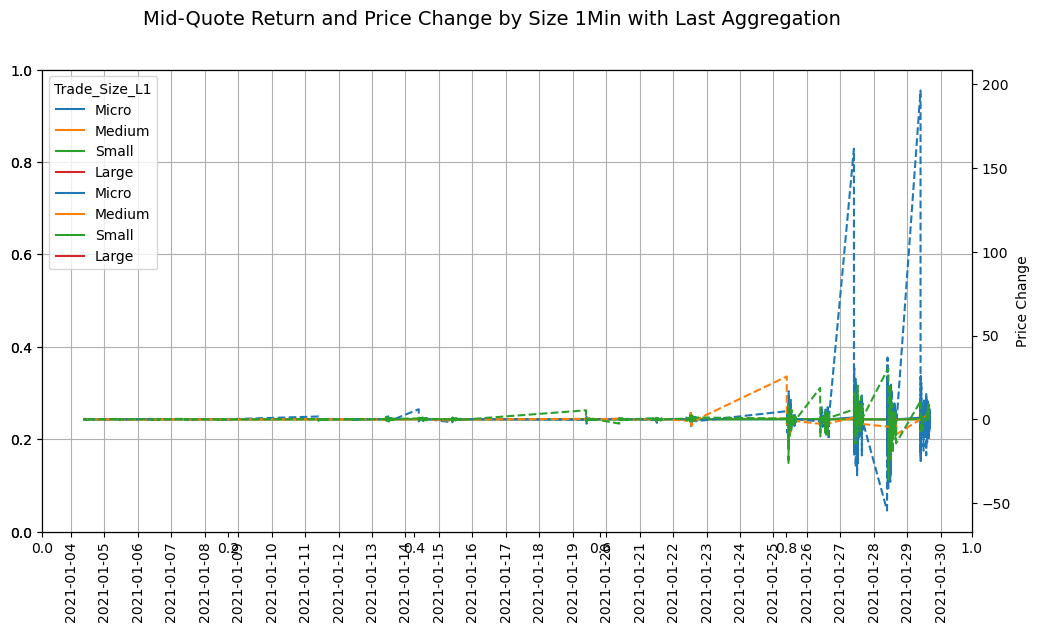

Micro     1000520
Small      343165
Medium      33836
Large         338
Name: Trade_Size_L1, dtype: int64

<100         1000520
100-199       250549
200-299        55447
300-399        24195
500-999        22078
400-499        12974
1000-2999       9761
3000-5999       1571
6000-9999        426
10000+           338
Name: Trade_Size_L2, dtype: int64

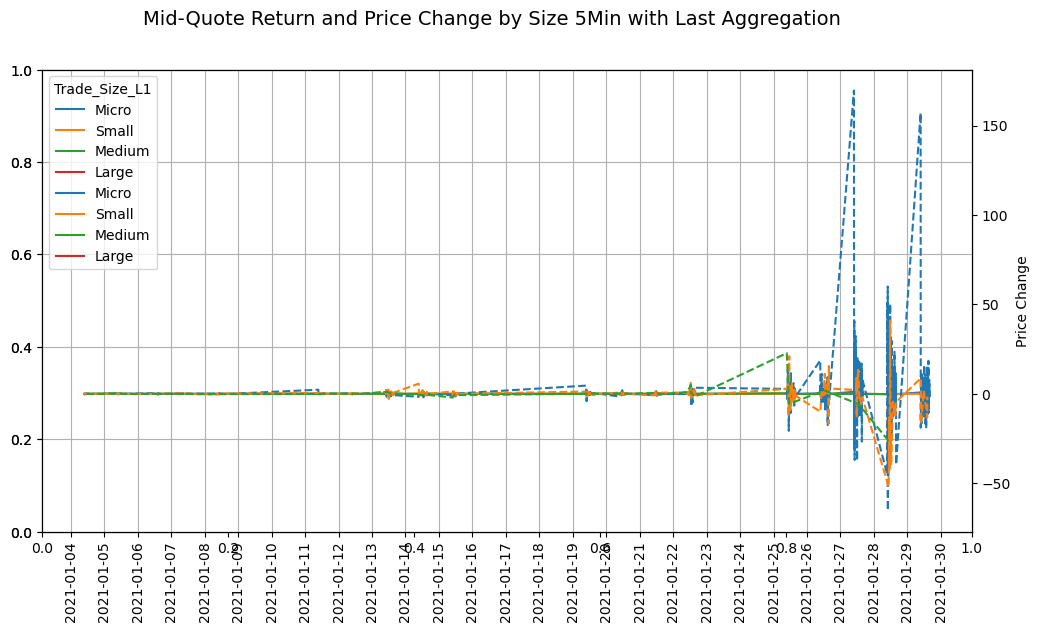

In [66]:
plot_(trade_1_min, '1Min', 'Last')
plot_(trade_5_min, '5Min', 'Last')

### Pivot Table

In [67]:
piv_cumprice(trade_1_min)
piv_cumprice(trade_5_min)

Price_Change  % Price_Change  # of Trade  \
Trade_Size_L1 Trade_Size_L2                                             
Small         100-199           16.389833            5.30        2573   
              200-299           59.345500           19.19         591   
              300-399           -3.869500           -1.25         205   
              400-499          -10.095500           -3.26          89   
Micro         <100             279.403167           90.36        3693   
Medium        1000-2999        -20.157500           -6.52          56   
              3000-5999        -12.412500           -4.01           7   
              500-999           -0.063500           -0.02         177   
              6000-9999          0.700000            0.23           2   
Large         10000+            -0.025000           -0.01           1   
All                            309.215000          100.01        7394   

                             % Trade         Volume  % Volume  
Trade_Size_L1 Trade_Size_L2                                    
Small         100-199          34.80  274541.933333     31.89  
              200-299           7.99  123663.866667     14.36  
              300-399           2.77   64509.533333      7.49  
              400-499           1.20   37025.600000      4.30  
Micro         <100             49.95  101739.966667     11.82  
Medium        1000-2999         0.76   82759.000000      9.61  
              3000-5999         0.09   32365.200000      3.76  
              500-999           2.39  112562.400000     13.07  
              6000-9999         0.03   16852.000000      1.96  
Large         10000+            0.01   15000.000000      1.74  
All                            99.99  861019.500000    100.00

Price_Change  % Price_Change  # of Trade  \
Trade_Size_L1 Trade_Size_L2                                             
Small         100-199           -154.3150          -49.85         519   
              200-299             41.1875           13.31         118   
              300-399            -41.4200          -13.38          40   
              400-499              4.9250            1.59          22   
Micro         <100               467.7925          151.12         737   
Medium        1000-2999            1.4300            0.46          12   
              3000-5999          -26.8400           -8.67           2   
              500-999             16.4850            5.33          29   
Large         10000+               0.3150            0.10           1   
All                              309.5600          100.01        1480   

                             % Trade    Volume  % Volume  
Trade_Size_L1 Trade_Size_L2                               
Small         100-199          35.07   55061.0     29.65  
              200-299           7.97   24827.5     13.37  
              300-399           2.70   12401.0      6.68  
              400-499           1.49    9325.0      5.02  
Micro         <100             49.80   20118.0     10.83  
Medium        1000-2999         0.81   19145.0     10.31  
              3000-5999         0.14   10600.0      5.71  
              500-999           1.96   19232.0     10.36  
Large         10000+            0.07   15000.0      8.08  
All                           100.01  185709.5    100.01

### Var Ratio

In [72]:
trade_5_min[trade_5_min['Trade_Size_L1'] == 'Large'] #--> that's why no data on pivot because only 1, cannot calc STD

,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,Date,num_tick_direction,Exchange_Time_copy,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote
Date-Time,,,,,,,,,,,,,,,,,,
2021-01-14 15:55:00,Trade,39.95,15000.0,Large,10000+,39.91,13.0,39.95,107.0,^,2021-01-14,1.0,15:59:59.560242,39.93,0.007952,0.315,0.315,39.615


In [77]:
# Checking unique values because if there's only 1 entry, cannot calculate std - var

print('Trade_1_min unique value counts:\n', trade_1_min['Trade_Size_L1'].value_counts())
print('Trade_5_min unique value counts:\n', trade_5_min['Trade_Size_L1'].value_counts())

#--> from the result, exclude 'Large' from the variance ratio calc

Trade_1_min unique value counts:
 Micro     3693
Small     3458
Medium     242
Large        1
Name: Trade_Size_L1, dtype: int64
Trade_5_min unique value counts:
 Micro     737
Small     699
Medium     43
Large       1
Name: Trade_Size_L1, dtype: int64


In [79]:
# Assigning variable names for variance ratio study

# Trade_1_min

trade_1_min_varrat_df = []
trade_5_min_varrat_df = []

for i in ['Micro','Small', 'Medium']:
    trade_1_min_varrat = piv_varrat(trade_1_min[trade_1_min['Trade_Size_L1'] == i])
    trade_1_min_varrat_df.append(trade_1_min_varrat)
    
    trade_5_min_varrat = piv_varrat(trade_5_min[trade_5_min['Trade_Size_L1'] == i])
    trade_5_min_varrat_df.append(trade_5_min_varrat)
    
# Test
display(trade_1_min_varrat_df[0])
display(trade_5_min_varrat_df[2])


,,STD of MQR,Variance
,Trade_Size_L1,,
2021-01-04,Micro,0.002254,0.000005
2021-01-05,Micro,0.001816,0.000003
2021-01-06,Micro,0.002863,0.000008
2021-01-07,Micro,0.002001,0.000004
2021-01-08,Micro,0.002508,0.000006
2021-01-11,Micro,0.009967,0.000099
2021-01-12,Micro,0.001972,0.000004
2021-01-13,Micro,0.012238,0.000150
2021-01-14,Micro,0.016861,0.000284


,,STD of MQR,Variance
,Trade_Size_L1,,
2021-01-04,Medium,0.004490,2.016280e-05
2021-01-05,Medium,0.019660,3.865200e-04
2021-01-06,Medium,0.001152,1.327480e-06
2021-01-07,Medium,0.006172,3.809395e-05
2021-01-11,Medium,0.005218,2.723043e-05
2021-01-13,Medium,0.015733,2.475395e-04
2021-01-14,Medium,0.005799,3.362848e-05
2021-01-15,Medium,0.024015,5.767400e-04
2021-01-19,Medium,0.000728,5.298933e-07


In [115]:
# Inner Join based on Trade L1 -- different size different list

inner_join_df = []

for i in range(len(trade_1_min_varrat_df)): # --> contains 3 df of micro, small, medium
    index0_ = trade_1_min_varrat_df[i].index.names[0]
    index1_ = trade_1_min_varrat_df[i].index.names[1]
    
    # Inner Join and Rename Columns 
    in_join = pd.merge(trade_1_min_varrat_df[i], trade_5_min_varrat_df[i], on = [index0_, index1_], how = 'inner').rename(columns = {'STD of MQR_x':'STD of MQR_1', 
                                                                                                                                     'Variance_x':'Var_of_MQR_1',
                                               'STD of MQR_y':'STD of MQR_5', 'Variance_y':'Var_of_MQR_5'
                                               })
    
    # Variance Ratio calculation
    in_join['Var_Rat'] = np.abs((in_join['Var_of_MQR_5']/(5 * in_join['Var_of_MQR_1'])) - 1)
    
    inner_join_df.append(in_join)  

# Test
display(max(inner_join_df[0]['Var_Rat']), min(inner_join_df[0]['Var_Rat']))
display(max(inner_join_df[1]['Var_Rat']), min(inner_join_df[1]['Var_Rat']))
display(max(inner_join_df[2]['Var_Rat']), min(inner_join_df[2]['Var_Rat']))

# Twin axes because Medium Variance Ratio skews the observation

1.4902979855436134

0.009853694091011111

1.783465874703333

0.021133197097177092

8.211251593301622

0.06979604856009824

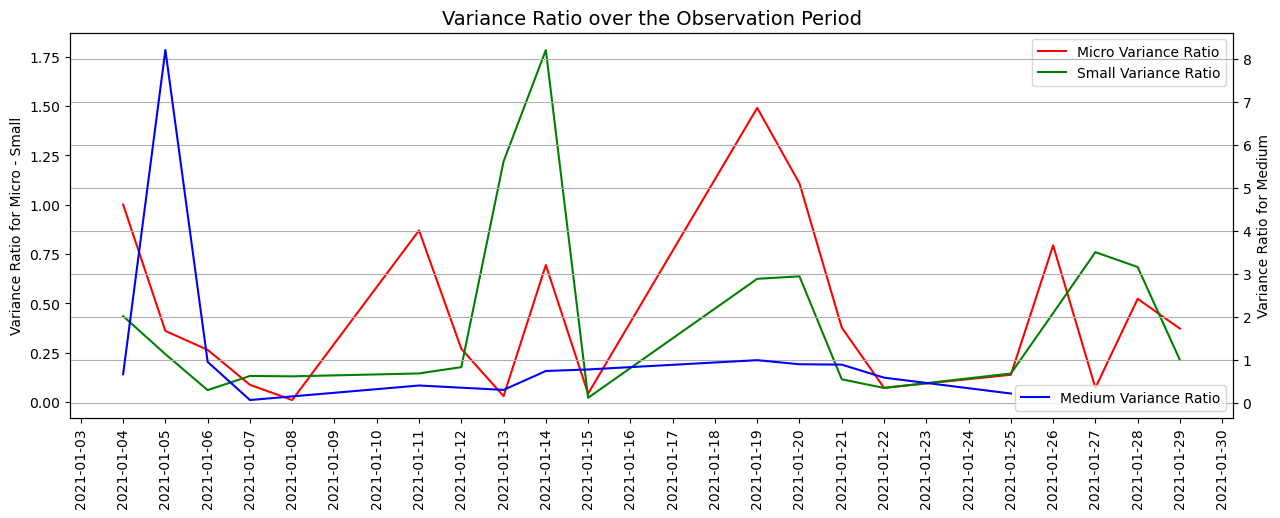

In [126]:
# Plotting the Variance Ratio among 3 trade sizes


# Index for plots Micro, Small, Medium

list_x_index = []

for i in inner_join_df:
    
    list_x = list(i['key_0'])
    index_date_ = []
    for j in list_x:
        date_a = j[0]
        index_date_.append(date_a)
    list_x_index.append(index_date_)

# print(list_x_index)

# Set x and y
index_mic = list_x_index[0]
index_s = list_x_index[1]
index_med = list_x_index[2]

var_rat_mic = inner_join_df[0]['Var_Rat']
var_rat_s = inner_join_df[1]['Var_Rat']
var_rat_med = inner_join_df[2]['Var_Rat']

# Plotting
fig, ax0 = plt.subplots(figsize = (15,5))
ax0.plot(index_mic, var_rat_mic, 'r-', label = 'Micro Variance Ratio')
ax0.plot(index_s, var_rat_s, 'g-', label = 'Small Variance Ratio')
plt.xticks(rotation = 90)

ax1 = ax0.twinx()
ax1.plot(index_med, var_rat_med, 'b-', label = 'Medium Variance Ratio')

ax0.legend(loc = 'upper right')
ax1.legend(loc = 'lower right')

# Ticks, Title, Labels
ax0.xaxis.set_major_locator(mdates.DayLocator())
ax0.set_ylabel('Variance Ratio for Micro - Small')
ax1.set_ylabel('Variance Ratio for Medium')

plt.grid()
plt.title('Variance Ratio over the Observation Period', fontsize = 14)
plt.show()


## Simple PI, Spread

In [138]:
simple_pi_spread(trade_1_min)
display(trade_1_min['TickSB'].value_counts())
simple_pi_spread(trade_5_min)
display(trade_5_min['TickSB'].value_counts())

1    7394
Name: TickSB, dtype: int64

1    1480
Name: TickSB, dtype: int64

In [146]:
simple_pi_spread(trade_1_min)
simple_pi_spread(trade_5_min)

,Type,Price,Volume,Trade_Size_L1,Trade_Size_L2,Bid Price,Bid Size,Ask Price,Ask Size,Tick Dir.,...,Mid_Quote,Mid_Quote_Return,Price_Change,Price_Change_Abs,Prev_Trade_Mid_Quote,TickSB,Next_Trade_Mid_Quote,Simple_PI,Eff_Spread,Realised_Spread
Date-Time,,,,,,,,,,,,,,,,,,,,,
2021-01-04 09:30:00,Trade,18.66,20.0,Micro,<100,18.65,9.0,18.71,3.0,v,...,18.680,0.000000,0.000,0.000,0.000,1,18.220,-0.049251,-2.141328e-03,0.047109
2021-01-04 09:35:00,Trade,18.20,157.0,Small,100-199,18.18,7.0,18.26,1.0,v,...,18.220,-0.024625,-0.460,0.460,18.680,1,18.150,-0.007684,-2.195390e-03,0.005488
2021-01-04 09:40:00,Trade,18.16,50.0,Micro,<100,18.09,1.0,18.21,1.0,^,...,18.150,-0.003842,-0.070,0.070,18.220,1,17.950,-0.022039,1.101928e-03,0.023140
2021-01-04 09:45:00,Trade,17.95,10.0,Micro,<100,17.92,2.0,17.98,1.0,^,...,17.950,-0.011019,-0.200,0.200,18.150,1,17.580,-0.041226,-3.958455e-16,0.041226
2021-01-04 09:50:00,Trade,17.57,47.0,Micro,<100,17.56,6.0,17.60,1.0,^,...,17.580,-0.020613,-0.370,0.370,17.950,1,17.430,-0.017065,-1.137656e-03,0.015927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 15:35:00,Trade,312.01,10.0,Micro,<100,311.07,1.0,314.99,2.0,v,...,313.030,0.000096,0.030,0.030,313.000,1,319.215,0.039517,-6.516947e-03,-0.046034
2021-01-29 15:40:00,Trade,319.23,30.0,Micro,<100,318.53,1.0,319.90,4.0,^,...,319.215,0.019758,6.185,6.185,313.030,1,326.980,0.048651,9.398055e-05,-0.048557
2021-01-29 15:45:00,Trade,328.19,8.0,Micro,<100,325.02,2.0,328.94,1.0,^,...,326.980,0.024325,7.765,7.765,319.215,1,325.395,-0.009695,7.401064e-03,0.017096


## Regression and Robustness Check

In [104]:
trade_1_min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7394 entries, 2021-01-04 09:30:00 to 2021-01-29 15:59:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  7144 non-null   object 
 1   Price                 7394 non-null   float64
 2   Volume                7394 non-null   float64
 3   Trade_Size_L1         7394 non-null   object 
 4   Trade_Size_L2         7394 non-null   object 
 5   Bid Price             7394 non-null   float64
 6   Bid Size              7394 non-null   float64
 7   Ask Price             7394 non-null   float64
 8   Ask Size              7394 non-null   float64
 9   Tick Dir.             7037 non-null   object 
 10  Date                  7144 non-null   object 
 11  num_tick_direction    7394 non-null   float64
 12  Exchange_Time_copy    7144 non-null   object 
 13  Mid_Quote             7394 non-null   float64
 14  Mid_Quote_Return      7394 non-null 

In [ ]:
# One-hot Encoding

X = trade_1_min(['Volume', 'Trade_Size_L1']) # PI
X = pd.get_dummies(data = X, columns = 'Trade_Size_L1')

print(f'X shape: {X.shape}')
y = trade_1_min['Price_Change']

# Not for Final Report

## Resample and Intervals 

In [71]:
# # Inner Join based on Trade L1 -- different size different list

# # Small
# index0_s = small_var_rat_1.index.names[0]
# index1_s = small_var_rat_1.index.names[1]

# s_var_rat_1_5 = pd.merge(small_var_rat_1, small_var_rat_5, on = [index0_s, index1_s], how = 'inner')
# # display(s_var_rat_1_5)

# # Medium
# index0_m = med_var_rat_1.index.names[0]
# index1_m = med_var_rat_5.index.names[1]

# m_var_rat_1_5 = pd.merge(med_var_rat_1, med_var_rat_5, on = [index0_m, index1_m], how = 'inner')
# # display(m_var_rat_1_5)


# # Rename Columns for Small
# s_var_rat_1_5 = s_var_rat_1_5.rename(columns = {'STD of MQR_x':'STD of MQR_1', 'Variance_x':'Var_of_MQR_1',
#                                                'STD of MQR_y':'STD of MQR_5', 'Variance_y':'Var_of_MQR_5'
#                                                })

# # Rename Columns for Medium
# m_var_rat_1_5 = m_var_rat_1_5.rename(columns = {'STD of MQR_x':'STD of MQR_1', 'Variance_x':'Var_of_MQR_1',
#                                                'STD of MQR_y':'STD of MQR_5', 'Variance_y':'Var_of_MQR_5'
#                                                })

# # Index for pivot Small

# list_s = list(s_var_rat_1_5['key_0'])
# index_date_s = []
# for i in list_s:
#     date_a = i[0]
#     index_date_s.append(date_a)


# # Index for pivot Medium

# list_m = list(m_var_rat_1_5['key_0'])
# index_date_m = []
# for i in list_m:
#     date_a = i[0]
#     index_date_m.append(date_a)
    
# # Add Variance Ratio Calculation
# s_var_rat_1_5['Var_Rat'] = np.abs((s_var_rat_1_5['Var_of_MQR_5']/(5 * s_var_rat_1_5['Var_of_MQR_1'])) - 1)
# m_var_rat_1_5['Var_Rat'] = np.abs((m_var_rat_1_5['Var_of_MQR_5']/(5 * m_var_rat_1_5['Var_of_MQR_1'])) - 1)

# display(s_var_rat_1_5)
# display(m_var_rat_1_5)

,key_0,STD of MQR_1,Var_of_MQR_1,STD of MQR_5,Var_of_MQR_5,Var_Rat
Trade_Size_L1,,,,,,
Small,"(2021-01-04, Small)",0.003171,0.000010,0.005329,0.000028,0.435155
Small,"(2021-01-05, Small)",0.002209,0.000005,0.004300,0.000018,0.242269
Small,"(2021-01-06, Small)",0.002647,0.000007,0.005739,0.000033,0.059948
Small,"(2021-01-07, Small)",0.002245,0.000005,0.005342,0.000029,0.131738
Small,"(2021-01-08, Small)",0.002210,0.000005,0.005253,0.000028,0.129921
Small,"(2021-01-11, Small)",0.004198,0.000018,0.008682,0.000075,0.144599
Small,"(2021-01-12, Small)",0.002347,0.000006,0.005693,0.000032,0.176529
Small,"(2021-01-13, Small)",0.011473,0.000132,0.038214,0.001460,1.219005
Small,"(2021-01-14, Small)",0.008282,0.000069,0.030897,0.000955,1.783466


,key_0,STD of MQR_1,Var_of_MQR_1,STD of MQR_5,Var_of_MQR_5,Var_Rat
Trade_Size_L1,,,,,,
Medium,"(2021-01-04, Medium)",0.003491,0.000012,0.004490,2.016280e-05,0.669198
Medium,"(2021-01-05, Medium)",0.002897,0.000008,0.019660,3.865200e-04,8.211252
Medium,"(2021-01-06, Medium)",0.002466,0.000006,0.001152,1.327480e-06,0.956339
Medium,"(2021-01-07, Medium)",0.002862,0.000008,0.006172,3.809395e-05,0.069796
Medium,"(2021-01-11, Medium)",0.003032,0.000009,0.005218,2.723043e-05,0.407512
Medium,"(2021-01-13, Medium)",0.006158,0.000038,0.015733,2.475395e-04,0.305639
Medium,"(2021-01-14, Medium)",0.005137,0.000026,0.005799,3.362848e-05,0.745096
Medium,"(2021-01-15, Medium)",0.008047,0.000065,0.024015,5.767400e-04,0.781198
Medium,"(2021-01-19, Medium)",0.005985,0.000036,0.000728,5.298933e-07,0.997041


In [ ]:
# trade_1_min_micro = trade_1_min[trade_1_min['Trade_Size_L1'] == 'Small']
# trade_5_min_micro = trade_5_min[trade_5_min['Trade_Size_L1'] == 'Small']
# trade_1_min_small = trade_1_min[trade_1_min['Trade_Size_L1'] == 'Small']
# trade_5_min_small = trade_5_min[trade_5_min['Trade_Size_L1'] == 'Small']
# trade_1_min_med = trade_1_min[trade_1_min['Trade_Size_L1'] == 'Medium']
# trade_5_min_med = trade_5_min[trade_5_min['Trade_Size_L1'] == 'Medium']
# # trade_1_min_large = trade_1_min[trade_1_min['Trade_Size_L1'] == 'Large']
# # trade_5_min_large = trade_5_min[trade_5_min['Trade_Size_L1'] == 'Large']


# small_var_rat_1 = piv_varrat(trade_1_min_small)
# small_var_rat_5 = piv_varrat(trade_5_min_small)

# med_var_rat_1 = piv_varrat(trade_1_min_med)
# med_var_rat_5 = piv_varrat(trade_5_min_med)

# # Trade_5_min

# # large_var_rat_1 = piv_varrat(trade_1_min_large)
# # large_var_rat_5 = piv_varrat(trade_5_min_large)

# display(small_var_rat_1)
# display(small_var_rat_1.index.names[1])

In [ ]:
def resample_last(df, interval):
    '''
    This will not be used in the final analysis -- only for gauging the impact of different
    resample aggregation functions.
    default interpolation: linear
    df input = df name, e.g. trade
    interval input = as per requirement, in string, e.g. 'T', '5S', etc
    '''
    df_res = df.resample(interval).last().interpolate(method = 'linear')
    
    nan_price = df_res[df_res['Price'].isna()].index
    print('Original focus length before resampled:', len(df))
    print('Length after resampled:', len(df_res))
    print(f'Total Price NA: {len(nan_price)}')
    if len(nan_price) == 0:
        print('OK')
    display(df_res.describe())
    
    return df_res, interval

In [ ]:
def resample_mean(df, interval):
    '''
    This will not be used in the final analysis -- only for gauging the impact of different
    resample aggregation functions.
    default interpolation: linear
    df input = df name, e.g. trade
    interval input = as per requirement, in string, e.g. 'T', '5S', etc
    '''
    df_res = df.resample(interval).mean().interpolate(method = 'linear')
    
    nan_price = df_res[df_res['Price'].isna()].index
    print('Original focus length before resampled:', len(df))
    print('Length after resampled:', len(df_res))
    print(f'Total Price NA: {len(nan_price)}')
    if len(nan_price) == 0:
        print('OK')
    display(df_res.describe())
    
    return df_res, interval

In [ ]:
# Compare Resample Intervals and Technique
trade_min_last, int1 = resample_last(trade, 'T')
trade_h_last, int2 = resample_last(trade, 'H')
trade_min_mean, int3 = resample_mean(trade, 'T')
trade_h_mean, int4 = resample_mean(trade, 'H')

In [ ]:
#     fig, ax = plt.subplots(figsize = (10,4))

#     ax = sns.lineplot(x = df.index, y = 'Mid_Quote_Return', data = df, hue = 'Trade_Size_L1')

#     ax.set_xlabel('Date-Time')
#     ax.set_ylabel('Mid_Quote_Return')
#     ax.xaxis.set_major_locator(mdates.DayLocator())

#     ax.legend()

#     plt.title(f'Mid_Quote_Return of  Resampled Data , S-M-L Trade Sizes')
#     plt.grid()
#     plt.xticks(rotation = 90)
#     plt.show()

#     display(df['Trade_Size_L1'].value_counts())
#     display(df['Trade_Size_L2'].value_counts())

In [ ]:
# # Take the minute _ last

# # Create Pivot Table

# dates = trade_min_last.index.date
# var_rat = pd.pivot_table(trade_min_last, index = [dates,'Trade_Size_L1'],
#                              values = ['Mid_Quote_Return'], 
#                               aggfunc = sum, fill_value = 0, margins = False)

# display(trade_min_last.loc[trade_min_last['Trade_Size_L1'] == 'Large'])
# var_rat

# # Looks like the var_rat data calc has issue for std... try in csv

In [ ]:
# # Test diff aggregate function

# trade_min_test = trade.resample('T').agg({'Price' : 'mean', 'Volume' : 'last'})
# display(trade_min_test)
# display(trade_min_test.describe())

In [ ]:
# Fill the NaN value

# trade_min.loc[-1, 'Mid_Quote_Return'] = 0 --> doesn't work, add last row index -1
# trade_min.info()
# trade_min.drop(-1, inplace = True) --> must drop first
# trade_min['Mid_Quote_Return'].iloc[-1] --> works alone, but has to be paired with column index
# trade_min.loc[trade_min['Mid_Quote_Return'].iloc[-1],'Mid_Quote_Return']  = 0 --> doesn't work, only int

In [ ]:
# Sorting L0 cat custom

# import pandas as pd

# # create a sample DataFrame
# df = pd.DataFrame({'A': ['foo', 'foo', 'bar', 'bar', 'foo', 'foo'],
#                    'B': ['one', 'one', 'one', 'two', 'two', 'one'],
#                    'C': [1, 2, 3, 4, 5, 6],
#                    'D': [7, 8, 9, 10, 11, 12]})

# # create pivot table
# pivot_table = pd.pivot_table(df, values=['C', 'D'], index=['A', 'B'], aggfunc={'C': 'sum', 'D': 'mean'})

# # define custom order for first level index
# custom_order = ['bar', 'foo']

# # create a Categorical data type with custom order
# cat_dtype = pd.CategoricalDtype(categories=custom_order, ordered=True)

# # convert first level index to Categorical data type
# pivot_table.index = pivot_table.index.set_levels(pivot_table.index.levels[0].astype(cat_dtype), level=0)

# # sort pivot table by first level index
# pivot_table = pivot_table.sort_values(by=pivot_table.index.levels[0].name)

# print(pivot_table)


In [ ]:
# Apply function how

# df = pd.DataFrame({'Name': ['John', 'Sammy', 'Stephan', 'Joe', 'Emily', 'Tom'],
#                    'Gender': ['Male', 'Female', 'Male',
#                               'Female', 'Female', 'Male'],
#                    'Age': [45, 6, 4, 36, 12, 43]})
# print("Dataset")
# print(df)
# print("-"*40)
  
# # categorizing in age groups
# def age_bucket(age):
#     if age <= 18:
#         return "<18"
#     else:
#         return ">18"
  
# df['Age Group'] = df['Age'].apply(age_bucket)
  
# # calculating gender percentage
# gender = pd.DataFrame(df.Gender.value_counts(normalize=True)*100).reset_index()
# gender.columns = ['Gender', '%Gender']
# df = pd.merge(left=df, right=gender, how='inner', on=['Gender'])
  
# # creating pivot table
# table = pd.pivot_table(df, index=['Gender', '%Gender', 'Age Group'], 
#                        values=['Name'], aggfunc={'Name': 'count',})
  
# # display table
# print("Table")
# print(table)

In [ ]:
# Aggregate Function

# mean(): calculates the mean of each group
# sum(): calculates the sum of each group
# max(): returns the maximum value of each group
# min(): returns the minimum value of each group
# first(): returns the first value of each group
# last(): returns the last value of each group
# count(): returns the number of non-NA/null values in each group
# median(): returns the median of each group
# std(): calculates the standard deviation of each group
# var(): calculates the variance of each group

In [ ]:
#     for i, size in enumerate(trade_size_l1):
#         subdata = trade[trade['Trade_Size_L1'] == size]
#         ax0.plot(subdata.index, subdata['Mid_Quote_Return'], label = 'Mid-Quote Return' + size)
#         ax1.plot(subdata.index, subdata['Price_Change'], label = 'Price Change' + size, ls = '--')


In [ ]:
## Plot and Bins

In [ ]:
# # fig, ax = plt.subplots(figsize = (10,4))

# sns.lineplot(x = trade.index, y = 'Mid_Quote_Return', data = trade) #, hue = 'Trade_Size_L1' --> always slow idk why

# # ax.set_xlabel('Date-Time')
# # ax.set_ylabel('Mid_Quote_Return')
# # ax.xaxis.set_major_locator(mdates.DayLocator())

# # ax.legend()

# # plt.title(f'Mid_Quote_Return, S-M-L Trade Sizes')
# # plt.grid()
# # plt.xticks(rotation = 90)
# plt.show()

# display(trade['Trade_Size_L1'].value_counts())
# display(trade['Trade_Size_L2'].value_counts())
# trade_size_l1 = trade['Trade_Size_L1'].unique()

# fig, ax = plt.subplots(figsize = (12,6))

# ax0 = fig.add_subplot()
# plt.xticks(rotation = 90)

# ax1 = ax0.twinx()

# for i, size in enumerate(trade_size_l1):
#     subdata = trade[trade['Trade_Size_L1'] == size]
#     ax0.plot(subdata.index, subdata['Mid_Quote_Return'], label = 'Mid-Quote Return' + size)
#     ax1.plot(subdata.index, subdata['Price_Change'], label = 'Price Change' + size, ls = '--')
    
# ax0.grid()

# # Ticks, Title, Labels
# ax0.xaxis.set_major_locator(mdates.DayLocator())
# ax0.set_ylabel('Mid-Quote Return')
# ax1.set_ylabel('Price Change')
# fig.legend()
# fig.suptitle('Mid-Quote Return and Price Change by Size (not resampled)', fontsize = 14)

# plt.show()


In [ ]:
# Plotting

# interval = [int1, int2, int3, int4]
# aggr = ['last', 'last', 'mean', 'mean']
# for i in range(len(result)):
#     plot_(result[i], interval[i], aggr[i])

